In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'custom'


#Then update the math texts with the fonts that are needed in math mode

plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'

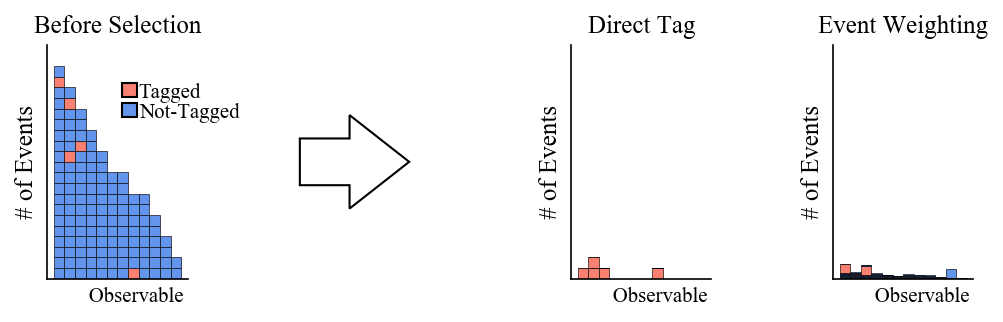

In [8]:
fig,ax = plt.subplots(1,4,figsize=(7,7/4+0.5),dpi=150)



n_boxes = np.array([10,9,8,7,6,5,5,4,4,3,2,1])*2

total_boxes = np.sum(n_boxes)
box_prob_low_prob = 0.01+ 0.05*np.random.rand(total_boxes)
box_prob_high_prob = 0.65+ 0.2*np.random.rand(total_boxes)
box_prob = box_prob_low_prob

boxes_with_high_prob = np.random.permutation(range(total_boxes))[:int(total_boxes/40)]
box_prob[boxes_with_high_prob] = box_prob_high_prob[boxes_with_high_prob]

scores = np.random.rand(total_boxes)

tagged = np.zeros(total_boxes)
tagged[scores < box_prob] = 1

box_colors = np.array(['cornflowerblue']*total_boxes)
box_colors[tagged==1] = 'salmon'

n_bins = len(n_boxes)


bin_edges = np.linspace(0,n_bins,n_bins+1).astype(int)

def draw_hist(ax_i,box_heights,box_colors):
    bin_values = [0]*n_bins
    box_index = -1
    for bin_i in range(n_bins):

        bin_center = bin_i+0.5
        width = 1

        for box_i in range(n_boxes[bin_i]):
            box_index+=1
            height = box_heights[box_index]
            c = str(box_colors[box_index])
            #print(c)
            ax_i.bar([bin_center],[height],bottom=[bin_values[bin_i]],width=width,color=c,edgecolor='k',linewidth=0.3)
            bin_values[bin_i]+=height


draw_hist(ax[0],np.ones(total_boxes),box_colors)
draw_hist(ax[3],box_prob,box_colors)
draw_hist(ax[2],tagged,['salmon']*total_boxes)

ax[0].set_title('Before Selection',fontsize=12)
ax[2].set_title('Direct Tag',fontsize=12)
ax[3].set_title('Event Weighting',fontsize=12)
for i in [0,2,3]:
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_aspect(1)
    ax[i].set_ylim(0,22)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].set_xlabel('       Observable',fontsize=10)
    ax[i].set_ylabel('# of Events',fontsize=12)
ax[1].set_axis_off()

#ax[1].

ax[1].arrow(0.1,0.5,0.25,0,width=0.2,lw=1,head_width=0.4, head_length=0.3, fc='white', ec='k',fill=True)

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [ Patch(facecolor='salmon', edgecolor='k',
                         label='Tagged'), Patch(facecolor='cornflowerblue', edgecolor='k',
                         label='Not-Tagged')]


ax[0].legend(handles=legend_elements,
            fontsize=10,bbox_to_anchor=(0.4,0.92),frameon=False,fancybox=False,shadow=False,
                handletextpad=0.1,labelspacing=0.001,handlelength=0.7)


plt.tight_layout()
plt.savefig('truthtag.pdf',bbox_inches='tight')
plt.show()

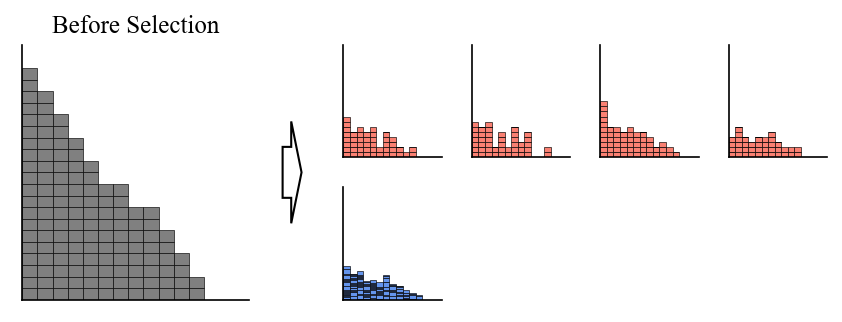

In [44]:
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch


fig = plt.figure(figsize=(7,7/4+0.5),dpi=150)
spec = gridspec.GridSpec(ncols=16, nrows=4, figure=fig)

ax = [
    fig.add_subplot(spec[:,:4]),
    fig.add_subplot(spec[:,4:5]),
    fig.add_subplot(spec[:2,5:7]),
    fig.add_subplot(spec[2:,5:7]),
    
    fig.add_subplot(spec[:2,7:9]),
    fig.add_subplot(spec[:2,9:11]),
    fig.add_subplot(spec[:2,11:13]),
    
]
n_boxes = np.array([10,9,8,7,6,5,5,4,4,3,2,1])*2

total_boxes = np.sum(n_boxes)
box_prob_low_prob = 0.1+ 0.2*np.random.rand(total_boxes)
box_prob_high_prob = 0.65+ 0.2*np.random.rand(total_boxes)
box_prob = box_prob_low_prob

boxes_with_high_prob = np.random.permutation(range(total_boxes))[:int(total_boxes/4)]
box_prob[boxes_with_high_prob] = box_prob_high_prob[boxes_with_high_prob]

scores = np.random.rand(total_boxes)
tagged = np.zeros(total_boxes)
tagged[scores < box_prob] = 1

box_colors = np.array(['gray']*total_boxes)
#box_colors[tagged==1] = 'salmon'

n_bins = len(n_boxes)


bin_edges = np.linspace(0,n_bins,n_bins+1).astype(int)

def draw_hist(ax_i,box_heights,box_colors):
    bin_values = [0]*n_bins
    box_index = -1
    for bin_i in range(n_bins):

        bin_center = bin_i+0.5
        width = 1

        for box_i in range(n_boxes[bin_i]):
            box_index+=1
            height = box_heights[box_index]
            c = str(box_colors[box_index])
            #print(c)
            ax_i.bar([bin_center],[height],bottom=[bin_values[bin_i]],width=width,color=c,edgecolor='k',linewidth=0.3)
            bin_values[bin_i]+=height


draw_hist(ax[0],np.ones(total_boxes),box_colors)
draw_hist(ax[3],box_prob,np.array(['cornflowerblue']*total_boxes))
draw_hist(ax[2],tagged,['salmon']*total_boxes)

ax[0].set_title('Before Selection',fontsize=12)
#ax[2].set_title('Direct Tag',fontsize=12)
#ax[3].set_title('Event Weighting',fontsize=12)
for i in [0,2,3]:
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    #ax[i].set_aspect(1)
    ax[i].set_ylim(0,22)
    ax[i].set_xlim(0,15)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    #ax[i].set_xlabel('       Observable',fontsize=10)
    #ax[i].set_ylabel('# of Events',fontsize=12)
ax[1].set_axis_off()



for i in [4,5,6]:
    scores = np.random.rand(total_boxes)
    tagged = np.zeros(total_boxes)
    tagged[scores < box_prob] = 1
    draw_hist(ax[i],tagged,['salmon']*total_boxes)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].set_ylim(0,22)
    ax[i].set_xlim(0,15)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
#ax[1].

ax[1].arrow(0.1,0.5,0.25,0,width=0.2,lw=1,head_width=0.4, head_length=0.3, fc='white', ec='k',fill=True)

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# legend_elements = [ Patch(facecolor='salmon', edgecolor='k',
#                          label='Tagged'), Patch(facecolor='cornflowerblue', edgecolor='k',
#                          label='Not-Tagged')]


# ax[0].legend(handles=legend_elements,
#             fontsize=10,bbox_to_anchor=(0.4,0.92),frameon=False,fancybox=False,shadow=False,
#                 handletextpad=0.1,labelspacing=0.001,handlelength=0.7)

# style="Simple,tail_width=0.5,head_width=4,head_length=8"
# kw = dict(arrowstyle=style, color="k")
# a3 = patches.FancyArrowPatch((1,0.57), (30,0.57),connectionstyle="arc3,rad=0", **kw)
# ax[0].add_patch(a3)
# con = ConnectionPatch(xyA=(0,15), xyB=(0,0), coordsA="data", coordsB="data",
#                       axesA=ax[0], axesB=ax[3])
# ax[0].add_artist(con)


plt.tight_layout()
plt.savefig('truthtag2.pdf',bbox_inches='tight')
plt.show()

In [53]:
np.random.rand(10000)

array([0.38753542, 0.65496312, 0.63666354, ..., 0.17386951, 0.09415153,
       0.37136703])

In [23]:
np.random.gamma(1,1,100)

array([3.54600131e-01, 1.01378107e+00, 1.66222112e+00, 1.23527590e+00,
       1.23128157e+00, 8.83865316e-01, 6.64569100e-01, 1.05886653e+00,
       3.52682622e-01, 5.00774433e-01, 2.79834362e-02, 1.10406853e+00,
       1.69710923e+00, 8.49715821e-01, 2.00768252e-01, 1.95589745e-01,
       1.30787665e+00, 1.77013439e+00, 2.01643008e+00, 5.36438751e-01,
       2.65596803e-01, 1.09609922e-01, 2.50512143e+00, 9.29006717e-01,
       2.81013637e+00, 1.19846844e+00, 3.73757365e-02, 5.72489793e-01,
       1.28497946e+00, 1.67740595e-01, 9.42364727e-02, 6.65837179e-01,
       2.12743547e+00, 2.01792576e+00, 2.59906365e-01, 3.19217025e-01,
       1.97621442e-01, 7.18859230e-01, 8.18342827e-01, 7.81136481e-01,
       9.33120861e-01, 2.95000585e+00, 9.99956701e-01, 7.75969851e+00,
       2.55322323e-01, 7.43652219e-01, 3.41424115e-01, 8.44815358e-01,
       5.58662525e-02, 1.00024238e-01, 8.77586635e-02, 1.04590093e+00,
       3.59673852e-01, 2.01770149e-01, 1.69051794e-01, 4.41762386e-01,
      

In [4]:
from scipy.spatial import ConvexHull
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib import colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import dgl
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.patches as patches
import itertools

def add_circle(p,radius):
	x, y = p
	added_points = []
	for n in range(36):
		ang = (2*np.pi)*(float(n)/36.0)
		new_p = [ x+radius*np.cos(ang),y+radius*np.sin(ang) ]
		added_points.append(new_p)
		
	return added_points

def fill_points(points_list,r=0.18):
	extended = []
	for p in points_list:
		extended.append(p)
		added = add_circle(p,r)
		for ad in added:
			extended.append(ad)
	return np.array(extended)

def draw_outline(points,ax,lcolor):

    fill_p = fill_points(points,r=0.015)
    hull = ConvexHull(fill_p)
    for simplex in hull.simplices:
        
        ax.plot(fill_p[simplex, 0], fill_p[simplex, 1],linestyle='--',color=lcolor,lw=0.9)
        
def draw_backdrop(pos,ax):
    points = []
    for key in pos:
        points.append(pos[key])
    fill_p = fill_points(points,r=0.015)
    hull = ConvexHull(fill_p)
    fill_p = np.array(fill_p)
    poly_faces = []
#     for simplex in hull.simplices:
#         #ax.plot(fill_p[simplex, 0], fill_p[simplex, 1],linestyle='--',color='k')
        
#         poly_faces.append([ fill_p[simplex, 0][0], fill_p[simplex, 1][0]])
#         poly_faces.append([ fill_p[simplex, 0][1], fill_p[simplex, 1][1]])
    for vertex in hull.vertices:
        poly_faces.append(fill_p[vertex])
    poly_faces = np.array(poly_faces)
    
    polygon = Polygon(poly_faces,True)
    
    
    p = PatchCollection([polygon],color= 'gray' , alpha=0.05)
    
    ax.add_collection(p)

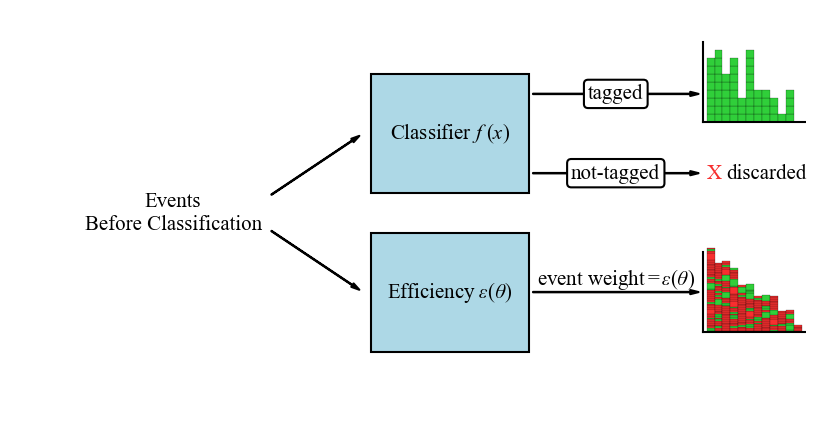

In [22]:
fig,ax = plt.subplots(figsize=(6.8,3.5),dpi=150)

mygreen = (48/255., 207/255., 58/255.)
myred = (247/255., 47/255., 47/255.)

points = np.zeros((0,2))
for theta in np.linspace(0,1,20):
    points = np.concatenate( (points, theta-0.2+0.4*np.random.rand(10,2)) )

ax.text(0.2,0.5,'Events\nBefore Classification',fontsize=10,ha='center',va='center')
#ax.text(0.2,0.88,r'in ($x,\theta$) space',fontsize=10,ha='center')
#ax.scatter(0.1+points[:,0]*0.2,0.3+points[:,1]*0.4,s=8,ec='k',fc='gray')



n_boxes = np.array([10,9,8,7,6,5,5,4,4,3,2,1])*4

total_boxes = np.sum(n_boxes)
box_prob_low_prob = 0.2+ 0.05*np.random.rand(total_boxes)
box_prob_high_prob = 0.65+ 0.2*np.random.rand(total_boxes)
box_prob = box_prob_low_prob

boxes_with_high_prob = np.random.permutation(range(total_boxes))[:20]
box_prob[boxes_with_high_prob] = box_prob_high_prob[boxes_with_high_prob]

scores = 0.1+0.9*np.random.rand(total_boxes)

tagged = np.zeros(total_boxes)
tagged[scores < box_prob] = 1

box_colors = np.array([myred]*total_boxes)
box_colors[tagged==1] = mygreen

n_bins = len(n_boxes)


bin_edges = np.linspace(0,n_bins,n_bins+1).astype(int)

def draw_hist(ax_i,box_heights,box_colors,offset,total_width):
    
    
    
    bin_values = [0]*n_bins
    box_index = -1
    
    width_scale = total_width/float(n_bins)
    
    for bin_i in range(n_bins):

        bin_center = (bin_i+0.5)*width_scale
        width = width_scale

        for box_i in range(n_boxes[bin_i]):
            box_index+=1
            height = box_heights[box_index]*width_scale*2
            if height == 0:
                continue
            c = str(box_colors[box_index])
            #print(c)
            rect = patches.Rectangle((offset[0]+bin_center,offset[1]+bin_values[bin_i]),
                                     width,height,linewidth=0.1,edgecolor='k',alpha=1,
                                     facecolor=box_colors[box_index])

            # Add the patch to the Axes
            ax_i.add_patch(rect)
            bin_values[bin_i]+=height
    
    ax.plot([offset[0],offset[0]+(n_bins+3)*width_scale],[offset[1],offset[1]],c='k',linewidth=1)
    ax.plot([offset[0],offset[0]],[offset[1],offset[1]+width_scale*20],c='k',linewidth=1)
#draw_hist(ax,np.ones(total_boxes),box_colors,(0,0),0.1)

hist_x = 0.87
#draw_hist(ax,np.ones(total_boxes),['gray']*total_boxes,(0.15,0.3),0.08)
draw_hist(ax,tagged,[mygreen]*total_boxes,(hist_x,0.73),0.12)
draw_hist(ax,box_prob,box_colors,(hist_x,0.2),0.12) #np.array(['cornflowerblue']*total_boxes

ax.text(0.45+0.1,0.55+0.15,r'Classifier $f$ $(x)$',fontsize=10,ha='center',va='center')
rect = patches.Rectangle((0.45,0.55),0.2,0.3,linewidth=1,edgecolor='k',alpha=1,
                                     facecolor='lightblue')
ax.add_patch(rect)


ax.text(0.45+0.1,0.15+0.15,r'Efficiency $\epsilon$$(\theta)$',fontsize=10,ha='center',va='center')
rect = patches.Rectangle((0.45,0.15),0.2,0.3,linewidth=1,edgecolor='k',alpha=1,
                                     facecolor='lightblue')
ax.add_patch(rect)



style="Simple,tail_width=0.2,head_width=2,head_length=4"
kw = dict(arrowstyle=style, color="k")
a3 = patches.FancyArrowPatch((0.32,0.15+0.35+0.04), (0.44,0.55+0.15),connectionstyle="arc3,rad=0", **kw)
ax.add_patch(a3)


a3 = patches.FancyArrowPatch((0.32,0.15+0.35-0.04), (0.44,0.15+0.3-0.15),connectionstyle="arc3,rad=0", **kw)
ax.add_patch(a3)

ax.text(0.65+0.11,0.15+0.15,r'event weight$=\epsilon (\theta)$',fontsize=10,ha='center',va='bottom')
a3 = patches.FancyArrowPatch((0.65,0.15+0.15), (0.87,0.15+0.15),connectionstyle="arc3,rad=0", **kw)
ax.add_patch(a3)


a3 = patches.FancyArrowPatch((0.65,0.55+0.05), (0.87,0.55+0.05),connectionstyle="arc3,rad=0", **kw)
ax.add_patch(a3)

a3 = patches.FancyArrowPatch((0.65,0.55+0.3-0.05), (0.87,0.55+0.3-0.05),connectionstyle="arc3,rad=0", **kw)
ax.add_patch(a3)

ax.text(0.9,0.55+0.05,r'discarded',fontsize=10,ha='left',va='center')
ax.text(0.875,0.55+0.05,r'X',fontsize=10,ha='left',color=myred,va='center')

ax.text(0.65+0.11,0.55+0.3-0.05,r'tagged',fontsize=10,
        va='center',ha='center',bbox=dict(fc='white',boxstyle='round,pad=0.2'))
ax.text(0.65+0.11,0.55+0.05,r'not-tagged',fontsize=10,
        va='center',ha='center',bbox=dict(fc='white',boxstyle='round,pad=0.2'))

#ax.plot([0.05,0.3],[0.15,0.15],c='k')
#ax.plot([0.05,0.05],[0.15,0.55+0.3],c='k')

#ax.text(0.2,0.1,r'$x$',fontsize=12,ha='center')
#ax.text(0.04,0.5,r'$\theta$',fontsize=12,ha='right')

ax.set_xlim(0,1)
ax.set_ylim(0,1)

ax.set_axis_off()
plt.savefig('/Users/jshlomi/Desktop/temp_tt/paper/5e333eb35e63e000015ede68/figures/truthtag.pdf',bbox_inches='tight')
plt.show()

In [188]:
box_colors

array(['red', 'red', 'red', 'red', 'red', 'gre', 'gre', 'gre', 'gre',
       'gre', 'gre', 'red', 'gre', 'red', 'gre', 'red', 'red', 'gre',
       'gre', 'red', 'red', 'red', 'red', 'red', 'gre', 'gre', 'gre',
       'gre', 'red', 'gre', 'gre', 'red', 'red', 'gre', 'red', 'red',
       'gre', 'red', 'gre', 'red', 'gre', 'gre', 'red', 'gre', 'gre',
       'gre', 'gre', 'red', 'gre', 'gre', 'gre', 'gre', 'red', 'gre',
       'red', 'gre', 'red', 'gre', 'red', 'gre', 'gre', 'gre', 'red',
       'gre', 'gre', 'gre', 'gre', 'gre', 'gre', 'gre', 'red', 'red',
       'gre', 'gre', 'red', 'red', 'red', 'red', 'gre', 'gre', 'gre',
       'gre', 'red', 'red', 'red', 'gre', 'gre', 'red', 'red', 'gre',
       'red', 'red', 'gre', 'red', 'red', 'gre', 'red', 'gre', 'gre',
       'gre', 'gre', 'gre', 'red', 'red', 'gre', 'red', 'red', 'gre',
       'red', 'gre', 'gre', 'red', 'red', 'gre', 'red', 'gre', 'gre',
       'gre', 'red', 'gre', 'red', 'gre', 'gre', 'gre', 'gre', 'gre',
       'gre', 'gre']

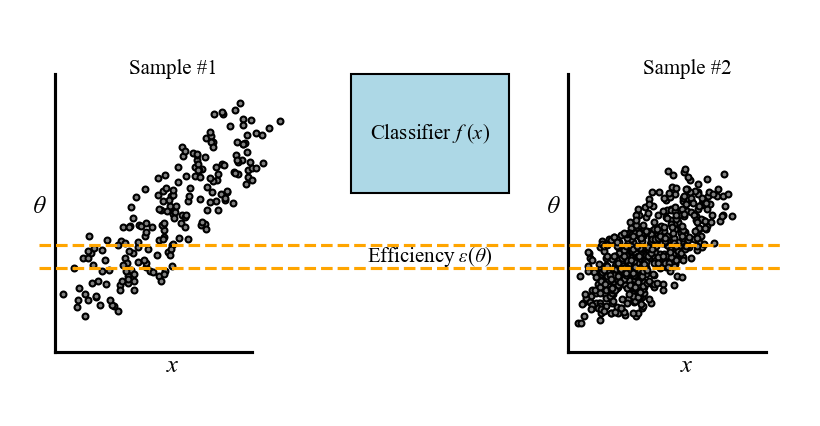

In [75]:
fig,ax = plt.subplots(figsize=(6.8,3.5),dpi=150)

mygreen = (48/255., 207/255., 58/255.)
myred = (247/255., 47/255., 47/255.)

points = np.zeros((0,2))
for theta in np.linspace(0,1,20):
    points = np.concatenate( (points, theta-0.2+0.4*np.random.rand(10,2)) )

ax.text(0.2,0.85,'Sample #1',fontsize=10,ha='center')
#ax.text(0.2,0.88,r'in ($x,\theta$) space',fontsize=10,ha='center')
ax.scatter(0.1+points[:,0]*0.2,0.3+points[:,1]*0.4,s=8,ec='k',fc='gray')



second_offset = 0.65
ax.text(0.2+second_offset,0.85,'Sample #2',fontsize=10,ha='center')
points = np.zeros((0,2))
for theta in np.linspace(0,0.6,20):
    n_per_theta =  int( 15*(abs(theta-1)/0.4) )
    #print(n_per_theta)
    points = np.concatenate( (points, theta-0.2+0.4*np.random.rand(n_per_theta,2)) )

#ax.text(0.2,0.95,'Events before Classification',fontsize=10,ha='center')
#ax.text(0.2,0.88,r'in ($x,\theta$) space',fontsize=10,ha='center')
ax.scatter(0.1+second_offset+points[:,0]*0.2,0.3+points[:,1]*0.4,s=8,ec='k',fc='gray')


# rect = patches.Rectangle((0.2,0.1),0.2,0.3,linewidth=1,edgecolor='orange',linestyle='--',alpha=1,
#                                      facecolor='none')
# ax.add_patch(rect)


ax.plot([0.05,0.3],[0.15,0.15],c='k')
ax.plot([0.05,0.05],[0.15,0.55+0.3],c='k')


ax.plot([second_offset+0.05,second_offset+0.3],[0.15,0.15],c='k')
ax.plot([second_offset+0.05,second_offset+0.05],[0.15,0.55+0.3],c='k')

ax.text(0.2,0.1,r'$x$',fontsize=12,ha='center')
ax.text(0.04,0.5,r'$\theta$',fontsize=12,ha='right')

ax.text(second_offset+0.2,0.1,r'$x$',fontsize=12,ha='center')
ax.text(second_offset+0.04,0.5,r'$\theta$',fontsize=12,ha='right')


ax.plot([0.03,second_offset+0.32],[0.36,0.36],c='orange',linestyle='--')
ax.plot([0.03,second_offset+0.32],[0.42,0.42],c='orange',linestyle='--')


ax.text(0.2+second_offset/2.0,0.55+0.15,r'Classifier $f$ $(x)$',fontsize=10,ha='center',va='center')
rect = patches.Rectangle((0.2+second_offset/2.0-0.1,0.55),0.2,0.3,linewidth=1,edgecolor='k',alpha=1,
                                     facecolor='lightblue')
ax.add_patch(rect)

ax.text(0.2+second_offset/2.0,0.39,'Efficiency $\epsilon (\\theta)$',fontsize=10,ha='center',va='center')

ax.set_xlim(0,1)
ax.set_ylim(0,1)

ax.set_axis_off()
#plt.savefig('/Users/jshlomi/Desktop/temp_tt/paper/5e333eb35e63e000015ede68/figures/truthtag.pdf',bbox_inches='tight')
plt.show()

In [161]:
def pofxgiventheta(x,theta):
    return (15+9*(1-theta))*np.exp(-(x-theta)**2/(0.04+(1-theta)*0.1))+5*np.exp(-(x-(theta+0.3))**2/(0.3+theta*5))
    

In [162]:
pofxgiventheta(0.3,0.1)

21.919657204137323

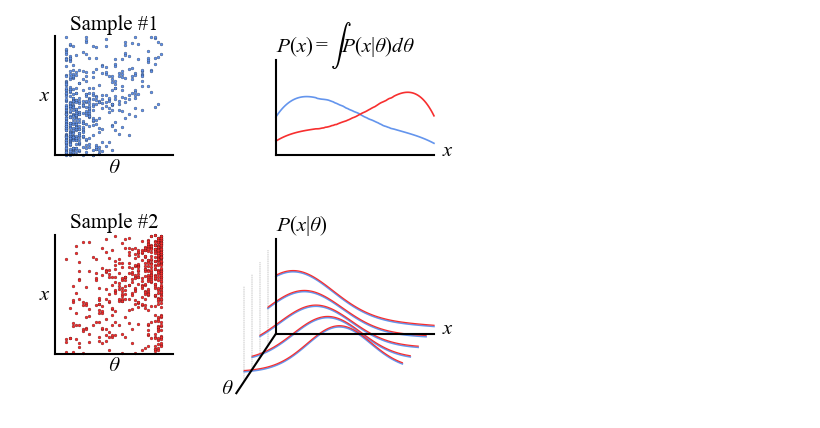

In [273]:
from scipy.signal import savgol_filter

fig,ax = plt.subplots(figsize=(6.8,3.5),dpi=150)

def draw_distribution(offset,total_width):
    
    
    xrange = np.linspace(0,1,100)
    scaled_x = offset[0]+(xrange/xrange[-1])*total_width
    
    diagonal_offset = [0,0]
    for theta in np.linspace(0.1,0.6,5):
        
        yvalues = pofxgiventheta(xrange,theta)
        integral = np.sum(yvalues)
        yvalues = yvalues/integral
        ax.plot(scaled_x+diagonal_offset[0],offset[1]+yvalues*8.0+diagonal_offset[1],
                c='cornflowerblue',linewidth=0.8)
        ax.plot(scaled_x+diagonal_offset[0],offset[1]+yvalues*8.0+diagonal_offset[1]+0.003,
                c=myred,linewidth=0.6)
        
        ax.plot([offset[0]+diagonal_offset[0],offset[0]+diagonal_offset[0]],
                [offset[1]+diagonal_offset[1],offset[1]+total_width*1.2+diagonal_offset[1]],c='gray',linewidth=0.2,linestyle='--')
        diagonal_offset[0]+=(-0.01)
        diagonal_offset[1]+=(-0.03)
        
    ax.plot([offset[0],offset[0]+total_width],[offset[1],offset[1]],c='k',linewidth=1)
    ax.plot([offset[0],offset[0]],[offset[1],offset[1]+total_width*1.2],c='k',linewidth=1)
    ax.plot([offset[0],offset[0]+diagonal_offset[0]],[offset[1],offset[1]+diagonal_offset[1]],c='k',linewidth=1)
    ax.text(offset[0]+diagonal_offset[0]-2*0.01,offset[1]+diagonal_offset[1],'$\\theta$',fontsize=10)
    ax.text(offset[0]+total_width+0.01,offset[1],'$x$',fontsize=10)
    ax.text(offset[0],offset[1]+total_width*1.3,'$P(x|\\theta)$',fontsize=10)
    
def draw_sample(offset,total_width,theta_range,theta_distribution,sample_i,sample_c):
    xrange = np.linspace(0,1,100)
    bin_width = xrange[1]-xrange[0]
    n_x_bins = len(xrange)
    
    bin_edges = [xrange[0]-bin_width*0.5+bin_width*i for i in range(n_x_bins+1)]
    
    points = np.zeros((0,2))
    for theta,n_per_theta in zip(theta_range,theta_distribution):
        yvalues = pofxgiventheta(xrange,theta)
        
        yvalues = yvalues/np.amax(yvalues)
        mc_points = np.random.rand(n_per_theta,2)
        points_to_add = []
        for mc_point in mc_points:
            xval,yval = mc_point
            xbin = np.digitize(xval,bin_edges)-1
            if yval < yvalues[xbin]:
                points_to_add.append([theta,xval])
        if len(points_to_add) > 0:
            points = np.concatenate( (points, np.array(points_to_add)) )
    
    sub_sample_points = points[np.random.permutation(range(len(points)))[:500]]
    
    ax.scatter(offset[0]+sub_sample_points[:,0]*total_width,offset[1]+sub_sample_points[:,1]*total_width*2,
               s=2,ec='k',fc=sample_c,linewidth=0.1)
    
    ax.plot([offset[0],offset[0]+total_width],[offset[1],offset[1]],c='k',linewidth=1)
    ax.plot([offset[0],offset[0]],[offset[1],offset[1]+total_width*2],c='k',linewidth=1)
    ax.text((offset[0]+offset[0]+total_width)/2.0,offset[1]-0.005,'$\\theta$',fontsize=10,va='top',ha='center')
    ax.text(offset[0]-0.005,(offset[1]+offset[1]+total_width*2)/2.0,'$x$',fontsize=10,ha='right',va='center')
    
    ax.text((offset[0]+offset[0]+total_width)/2.0,
            offset[1]+total_width*2+0.005,'Sample #'+str(sample_i),fontsize=10,ha='center',va='bottom')
    
    return np.histogram(points[:,1],bins=bin_edges)[0]
#plt.plot(xrange,pofxgiventheta(xrange,0.6))

total_x1 = draw_sample((0.05,0.65),0.15,np.linspace(0.1,0.9,30),
                       [int(600*(1/x)) for x in np.linspace(0.1,3,30)],1,'cornflowerblue')
total_x2 = draw_sample((0.05,0.15),0.15,np.linspace(0.1,0.9,30),
                       [int(600*(1/x)) for x in np.linspace(3,0.1,30)],2,myred)

def draw_total_dist(offset,total_width,total1,total2):
    xrange = np.linspace(0,1,100)
    scaled_x = offset[0]+(xrange/xrange[-1])*total_width
    scaled_total1 = total1/np.sum(total1)
    scaled_total2 = total2/np.sum(total2)
    
    scaled_total1 = savgol_filter( scaled_total1,51, 3)
    scaled_total2 = savgol_filter( scaled_total2,51, 3)
    ax.plot(scaled_x,offset[1]+scaled_total1*10,
                c='cornflowerblue',linewidth=0.8)
    ax.plot(scaled_x,offset[1]+scaled_total2*10,
                c=myred,linewidth=0.8)
    ax.plot([offset[0],offset[0]+total_width],[offset[1],offset[1]],c='k',linewidth=1)
    ax.plot([offset[0],offset[0]],[offset[1],offset[1]+total_width*1.2],c='k',linewidth=1)
    ax.text(offset[0]+total_width+0.01,offset[1],'$x$',fontsize=10)
    
    ax.text(offset[0],offset[1]+total_width*1.3,r'$P(x)=\int  P(x|\theta)d\theta$',fontsize=10)
draw_total_dist((0.33,0.65),0.2,total_x1,total_x2)

draw_distribution((0.33,0.2),0.2)

ax.set_xlim(0,1)
ax.set_ylim(0,1)

ax.set_axis_off()

plt.savefig('/Users/jshlomi/Desktop/parametrized_eff.pdf')
plt.show()




In [188]:
np.digitize(3,[0,2,5,7])

2

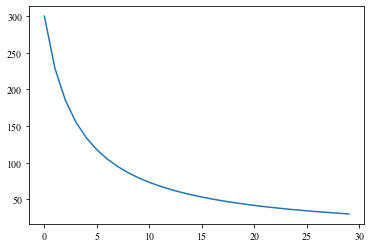

In [203]:
plt.plot([30*(1/x) for x in np.linspace(0.1,1,30)])

In [220]:
np.random.permutation(range(10))

array([4, 7, 3, 0, 8, 9, 6, 2, 1, 5])